Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2023/2024 
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija

**Rok za predaju: 9. svibnja 2024. (četvrtak) u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje. 

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
# Učitajte sve potrebne biblioteke
# <Vaš kôd ovdje>

import pandas as pd
import numpy as np
import numpy.linalg
import sklearn
from sklearn.decomposition import PCA
from sklearn import datasets
import scipy
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns

seed_value = 7621
np.random.seed(seed_value)

### 1. Skup podataka

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedećih 18 fondova:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `GLD` (SPDR Gold Trust) - zlato,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `USO` (United States Oil Fund) - nafta,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u danu $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte dnevne povrate te vizualizirajte matricu korelacije povrata. **U ostatku laboratorijske vježbe također koristite povrate, a ne cijene.** 

Null vrijednosti: Date    0
AGG     0
IEF     0
LQD     0
SHY     0
TIP     0
TLT     0
GLD     0
DBC     0
USO     0
XLE     0
IJH     0
IWM     0
SPY     0
VTV     0
XLF     0
XLK     0
IYR     0
VNQ     0
dtype: int64


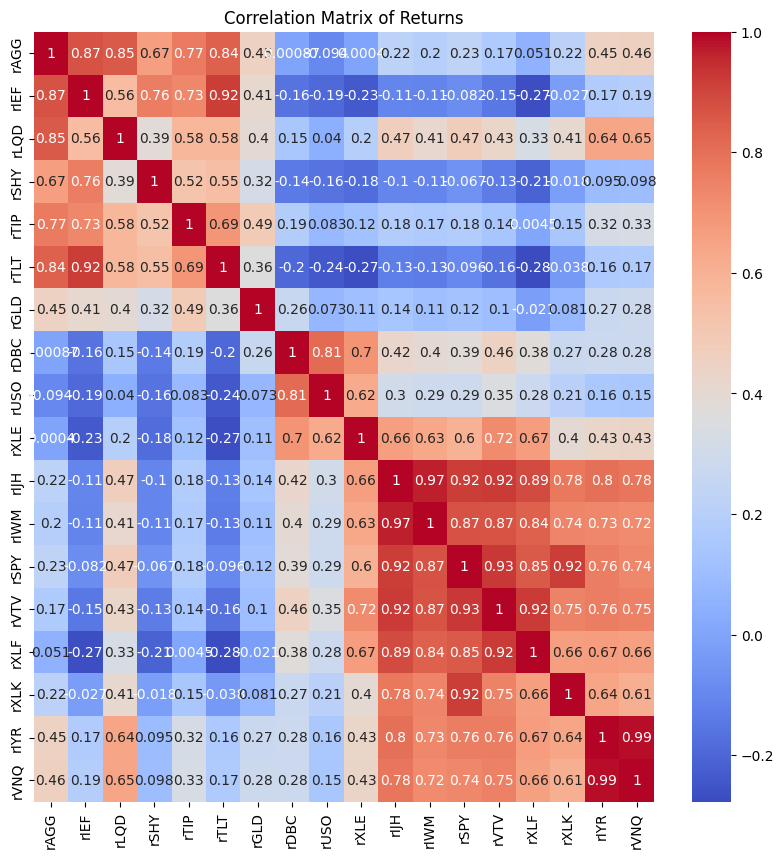

In [2]:
# <Vaš kôd ovdje>
ETFprices  = pd.read_csv("ETFprices.csv")

#print(ETFprices.head())

print("Null vrijednosti:",ETFprices.isna().sum())

returns = pd.DataFrame()

returns = ETFprices.copy()
returns.columns = ['Date'] + ['r' + col for col in returns.columns[1:]]

for col in returns.columns[1:]:
    returns[col] = (returns[col] - returns[col].shift(1)) / returns[col].shift(1)

#returns = returns.dropna() # jer se ne može izračunati za prvi redak

returns.head()

correlation_matrix = returns.iloc[:, 1:].corr()

plt.figure(figsize=(10, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Returns')
plt.show()



### 2. Analiza glavnih komponenti

#### (a) 
Izračunajte rastav matrice korelacije na glavne komponente. Izračunajte i ispišite koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

In [3]:
# <Vaš kôd ovdje>

pca = PCA()

pca.fit(correlation_matrix)
explained_variance_ratio = pca.explained_variance_ratio_
numComponents = len(pca.components_)

print("Broj komponenti:",numComponents)
print("-------------------------------------------")

sum = 0

for el in explained_variance_ratio :
    sum += el

#print(sum)
percentages = list()


for counter, el in enumerate(explained_variance_ratio) :

    print(f"Component {counter} explains {(el/sum)*100:.3f}% of variance.")
    percentages.append((el/sum)*100)

print("-------------------------------------------")    

Broj komponenti: 18
-------------------------------------------
Component 0 explains 78.225% of variance.
Component 1 explains 16.173% of variance.
Component 2 explains 2.279% of variance.
Component 3 explains 1.180% of variance.
Component 4 explains 0.615% of variance.
Component 5 explains 0.530% of variance.
Component 6 explains 0.450% of variance.
Component 7 explains 0.279% of variance.
Component 8 explains 0.101% of variance.
Component 9 explains 0.074% of variance.
Component 10 explains 0.057% of variance.
Component 11 explains 0.028% of variance.
Component 12 explains 0.005% of variance.
Component 13 explains 0.002% of variance.
Component 14 explains 0.001% of variance.
Component 15 explains 0.001% of variance.
Component 16 explains 0.000% of variance.
Component 17 explains 0.000% of variance.
-------------------------------------------


#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

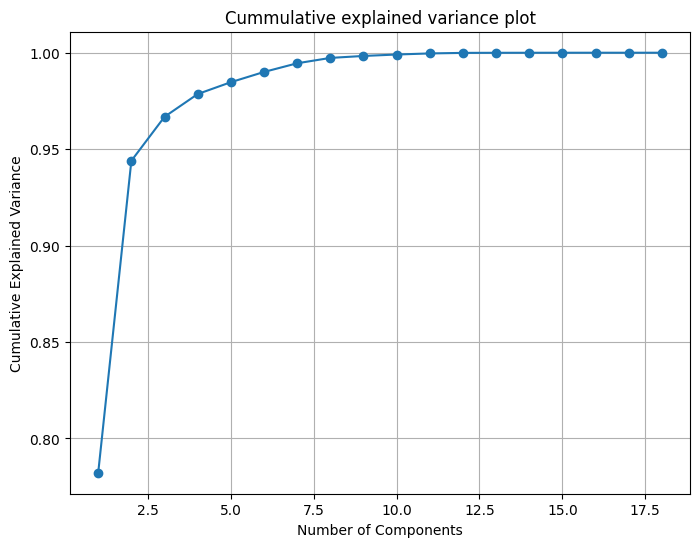

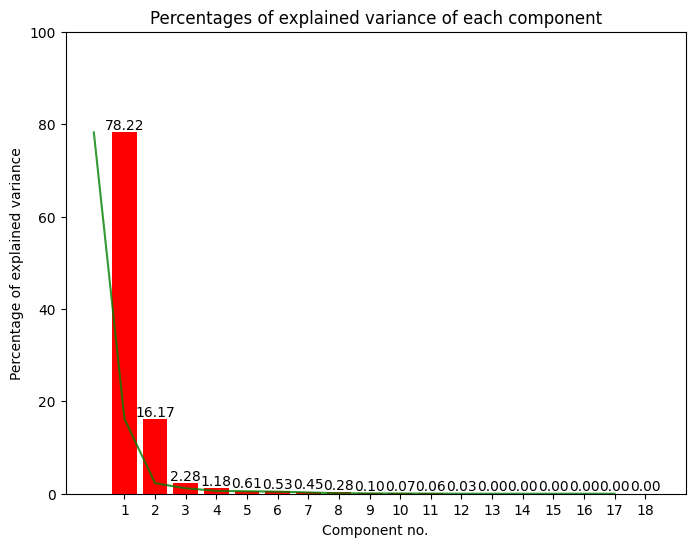

In [4]:
# <Vaš kôd ovdje>

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cummulative explained variance plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))  
plt.plot(percentages, color = "g",alpha = 0.8)
bars = plt.bar(range(1, len(percentages) + 1), percentages, align='center',color="r")  
plt.xticks(range(1, len(percentages) + 1), range(1, len(percentages) + 1)) 
plt.xlabel('Component no.')
plt.ylim(0,100)
plt.ylabel('Percentage of explained variance')
plt.title('Percentages of explained variance of each component')
plt.grid(False)
plt.bar_label(bars,fmt='%.2f')
plt.show()

#### (c) 
Prikažite graf raspršenja koeficijenata prve dvije glavne komponente. Naznačite oznake fondova i proučite možete li primijetiti neke zanimljive grupe.

Text(0, 0.5, 'rIEF coefficients')

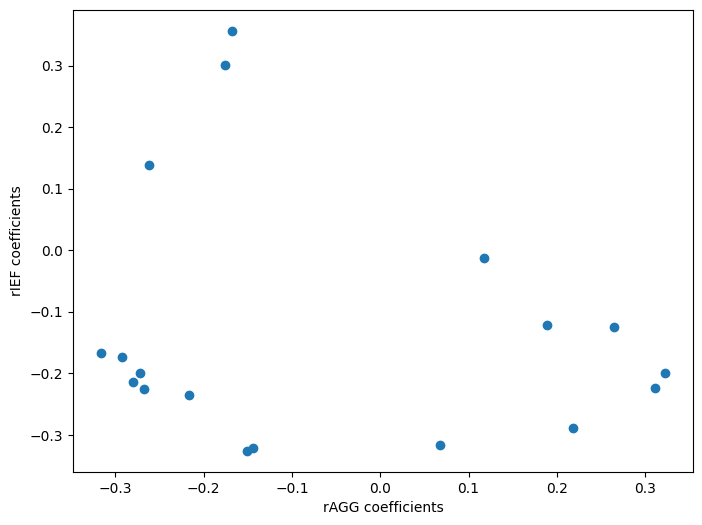

In [5]:
# <Vaš kôd ovdje>

plt.figure(figsize=(8,6))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel("rAGG coefficients")
plt.ylabel("rIEF coefficients")

#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. U ovom slučaju težine pojedinog svojstvenog portfelja su jednake elementima svojstvenih vektora ($w_j = e_{ij}$, gdje je $e_i$ $i$-ti svojstveni vektor). Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$ tako da: 
- pomnožite njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna,
- skalirate svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti: $\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Ispišite težine oba portfelja.

In [6]:
# <Vaš kôd ovdje>
# pca.components_  = eigenvectors

pca_components1and2 = pca.components_[:2]

eigen_portfolios = pca_components1and2 * np.sign(pca_components1and2.sum(axis=1, keepdims=True))

scaled_portfolios = eigen_portfolios / np.abs(eigen_portfolios).sum(axis=1, keepdims=True)

print("Weights of first scaled portfolio:")
print(scaled_portfolios[0])
print("\nWeights of second scaled portfolio:")
print(scaled_portfolios[1])

Weights of first scaled portfolio:
[-0.0541248  -0.07980603 -0.01678462 -0.06551472 -0.04671437 -0.07713913
 -0.02923344  0.0435783   0.0414824   0.06477112  0.0693205   0.06754141
  0.06628007  0.07252582  0.07833469  0.05368243  0.03741731  0.03574884]

Weights of second scaled portfolio:
[ 0.07319305  0.05050722  0.08016686  0.03163628  0.03072469  0.05686872
  0.00312712 -0.07620722 -0.09040249 -0.03511474  0.05430457  0.05064042
  0.05712199  0.04385969  0.04217128  0.0596866   0.08262759  0.08163947]


Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Povrate portfelja $w$ računamo kao $R_w = \sum_j^N{R_{j} w_j} = R\cdot w$, gdje je $R_{j}$ povrat vrijednosnice $j$. Izračunajte srednje vrijednosti i varijance oba svojstvena portfelja. Također, grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). 

Razmislite kolika bi bila varijanca $R_w$ ukoliko portfelji ne bi bili skalirani tj. da vrijedi $\tilde{w}_j = w_j$.

Means:
----------------
Mean (p1): 0.05860344950063223
Mean (p2)  0.13072864039577453
----------------
Var (p1): 0.052121191262182405
Var (p2)  0.03846557813582782


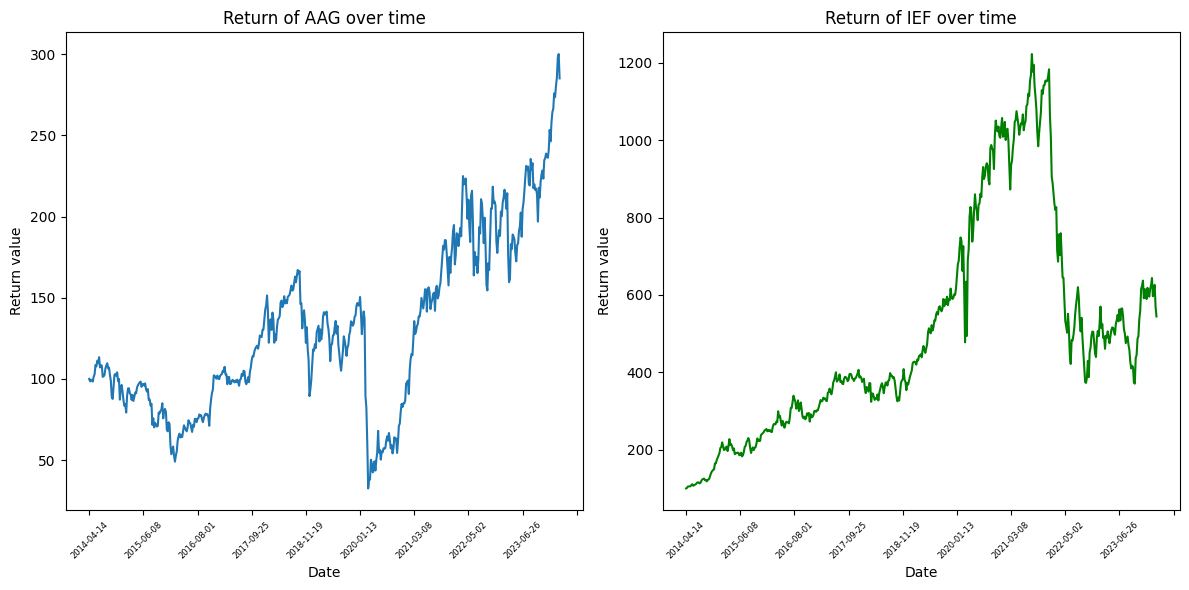

In [21]:
# <Vaš kôd ovdje>

returns_w1 = np.dot(returns.iloc[:, 1:], eigen_portfolios[0])

returns_w2 = np.dot(returns.iloc[:, 1:], eigen_portfolios[1])

print("Means:")
print("----------------")
mean_w1 = np.mean(eigen_portfolios[0])
mean_w2 = np.mean(eigen_portfolios[1])
print("Mean (p1):",mean_w1)
print("Mean (p2) ", mean_w2)
var_w1 = np.var(eigen_portfolios[0])
var_w2 = np.var(eigen_portfolios[1])
print("----------------")
print("Var (p1):",var_w1)
print("Var (p2) ", var_w2)

dates = ETFprices['Date']  

prices_w1 = [100]  
prices_w2 = [100]  

for i in range(1, len(returns_w1)):
    price_w1 = prices_w1[i-1] * returns_w1[i] + prices_w1[i-1]
    price_w2 = prices_w2[i-1] * returns_w2[i] + prices_w2[i-1]
    prices_w1.append(price_w1)
    prices_w2.append(price_w2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(dates, prices_w1, label='returns to prices - w1')
axes[1].plot(dates, prices_w2, label='returns to prices - w2',c="g")

axes[0].tick_params(axis='x', rotation=45, labelsize=6)
axes[0].xaxis.set_major_locator(plt.MaxNLocator(10))

axes[1].tick_params(axis='x', rotation=45, labelsize=6)
axes[1].xaxis.set_major_locator(plt.MaxNLocator(10))

axes[0].set_title(f'Return of AAG over time')
axes[1].set_title(f'Return of IEF over time')

axes[0].set_xlabel('Date')
axes[0].set_ylabel('Return value')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return value')

plt.tight_layout()

plt.show()

#returns_w2
 

### 3. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću metode glavnih komponenti i metode najveće izglednosti. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja?

In [84]:
# <Vaš kôd ovdje>
from sklearn.preprocessing import StandardScaler
import factor_analyzer
from factor_analyzer import FactorAnalyzer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(ETFprices.iloc[:,1:])

fa = FactorAnalyzer(n_factors=2, rotation=None, method='ml')   # 2 faktora jer prva dva objašnjavaju zajedno skoro sve
fa_3f = FactorAnalyzer(n_factors=3, rotation=None, method='ml') # za c) podzadatak

fa.fit(X_scaled)
fa_3f.fit(X_scaled)

factor_loadings = fa.loadings_
communalities_2f = fa.get_communalities()

communalities_3f = fa_3f.get_communalities()

print("L matrix: (Max. likelihood)")
print(factor_loadings)
print(" ")

print("Communalities: (Max likelihood)")
print(communalities_2f)

print("--------------------------------------------------")
pca2 = PCA()

pca2.fit(X_scaled)

initial_loading = pca2.components_.T

fa2 = FactorAnalyzer(n_factors=2, rotation=None)

fa2.loadings_ = initial_loading

fa2.fit(X_scaled)

factor_loadings2 = fa2.loadings_
communalities2 = fa2.get_communalities()

print("L matrix: (PCA)")
print(factor_loadings2)
print(" ")

print("Communalities: (PCA)")
print(communalities2)   # PCA mi se čini bolje

L matrix: (Max. likelihood)
[[ 0.91831487 -0.39057419]
 [ 0.79812215 -0.59399212]
 [ 0.95648941 -0.26214974]
 [ 0.96144965 -0.10596271]
 [ 0.96906486  0.06714799]
 [ 0.65087114 -0.74312704]
 [ 0.86957162  0.27412849]
 [ 0.22392978  0.78979255]
 [-0.68741475  0.14551619]
 [ 0.05071373  0.94920073]
 [ 0.85832893  0.49892184]
 [ 0.88648344  0.3588492 ]
 [ 0.88454742  0.45580767]
 [ 0.83999236  0.53428512]
 [ 0.8445233   0.50526084]
 [ 0.86698854  0.45474101]
 [ 0.9091945   0.25778616]
 [ 0.8961667   0.26096087]]
 
Communalities: (Max likelihood)
[0.9958504  0.9898256  0.98359449 0.93561353 0.94359555 0.97587104
 0.83130124 0.67391682 0.493714   0.90355391 0.98565156 0.91462564
 0.99018477 0.99104776 0.96850812 0.95845852 0.89308834 0.87121533]
--------------------------------------------------
L matrix: (PCA)
[[ 0.8220782  -0.56285671]
 [ 0.66694608 -0.73469957]
 [ 0.88283074 -0.43803521]
 [ 0.91485645 -0.28666914]
 [ 0.96948954 -0.09674247]
 [ 0.4915228  -0.83840995]
 [ 0.90026994  0.119

#### (b)
Izračunajte varimax rotaciju koeficijenata faktora za obje metode iz (a). Razmislite o intepretaciji.

In [76]:
# <Vaš kôd ovdje>

# <Vaš kôd ovdje>
from sklearn.preprocessing import StandardScaler
import factor_analyzer
from factor_analyzer import FactorAnalyzer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(ETFprices.iloc[:,1:])

fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')  

fa.fit(X_scaled)

factor_loadings = fa.loadings_
communalities = fa.get_communalities()

print("L matrix: (Max. likelihood + varimax)")
print(factor_loadings)
print(" ")

print("Communalities: (Max likelihood + varimax)")
print(communalities)

print("--------------------------------------------------")
pca2 = PCA()

pca2.fit(X_scaled)

initial_loading = pca2.components_.T

fa2 = FactorAnalyzer(n_factors=2, rotation='varimax')

fa2.loadings_ = initial_loading

fa2.fit(X_scaled)

factor_loadings2 = fa2.loadings_
communalities2 = fa2.get_communalities()

print("L matrix: (PCA + varimax)")
print(factor_loadings2)
print(" ")

print("Communalities: (PCA + varimax)")
print(communalities2)   


L matrix: (Max. likelihood + varimax)
[[ 0.43646794  0.8974108 ]
 [ 0.21227378  0.97199045]
 [ 0.54956095  0.82557692]
 [ 0.65581753  0.71099712]
 [ 0.77518511  0.58539184]
 [ 0.00329447  0.98785636]
 [ 0.83597526  0.36393215]
 [ 0.68732931 -0.44888221]
 [-0.42311041 -0.56097378]
 [ 0.6612748  -0.68283933]
 [ 0.9750377   0.18695734]
 [ 0.90434136  0.31111469]
 [ 0.96652001  0.23669355]
 [ 0.98441456  0.14824215]
 [ 0.96878266  0.17311346]
 [ 0.95257259  0.22597341]
 [ 0.85514239  0.40226836]
 [ 0.84739729  0.39132233]]
 
Communalities: (Max likelihood + varimax)
[0.9958504  0.9898256  0.98359449 0.93561353 0.94359555 0.97587104
 0.83130124 0.67391682 0.493714   0.90355391 0.98565156 0.91462564
 0.99018477 0.99104776 0.96850812 0.95845852 0.89308834 0.87121533]
--------------------------------------------------
L matrix: (PCA + varimax)
[[ 0.45377173  0.88696756]
 [ 0.23543286  0.96393563]
 [ 0.56673203  0.80627524]
 [ 0.66711737  0.68854625]
 [ 0.80577293  0.54772171]
 [ 0.03178064  0.

#### (c)
Izračunajte specifične varijance za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

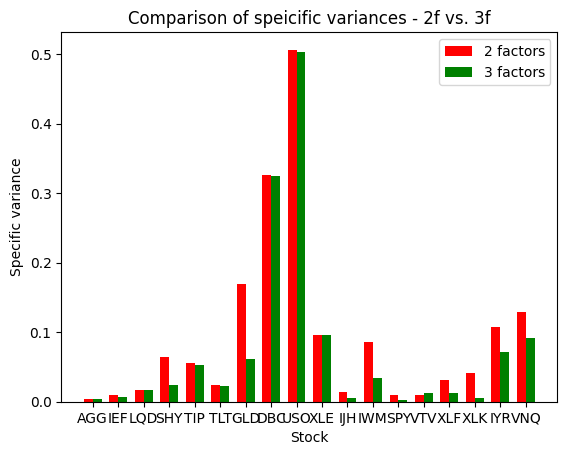

In [90]:
# <Vaš kôd ovdje>
specific_variances_2f = 1 - communalities_2f
specific_variances_3f = 1 - communalities_3f

labels = ['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'DBC', 'USO',
          'XLE', 'IJH', 'IWM', 'SPY', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']

bar_width = 0.35

r1 = range(len(specific_variances_2f))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, specific_variances_2f, color='r', width=bar_width, label='2 factors')
plt.bar(r2, specific_variances_3f, color='g', width=bar_width, label='3 factors')

plt.xlabel('Stock')
plt.ylabel('Specific variance')
plt.title('Comparison of speicific variances - 2f vs. 3f')
plt.xticks([r + bar_width/2 for r in range(len(specific_variances_2f))], labels)
plt.legend()

plt.show() # 2f daje veće vrijednosti specifične varijance


### 4. Multivarijatna linearna regresija

#### (a)
Naučite tri odvojena modela univarijatne linearne regresije, čije zavisne varijable su redom `AGG`, `DBC` i `SPY`. Kod svih triju modela kao nezavisne varijable koristite sve preostale ETF-ove (sve osim tih triju). Za svaku regresiju ispišite koeficijente te njihovu signifikantnost. 

In [106]:
# <Vaš kôd ovdje>

import statsmodels.api as sm

# Model for AGG
X_agg = ETFprices[['IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'USO', 'XLE', 'IJH', 'IWM', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_agg = ETFprices['AGG']
X_agg = sm.add_constant(X_agg)  
model_agg = sm.OLS(y_agg, X_agg).fit()
print(model_agg.summary())

print(" ")
print("----------------------------------------------------------------------")
print(" ")

# Model for DBC
X_dbc = ETFprices[['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'USO', 'XLE', 'IJH', 'IWM', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_dbc = ETFprices['DBC']
X_dbc = sm.add_constant(X_dbc) 
model_dbc = sm.OLS(y_dbc, X_dbc).fit()
print(model_dbc.summary())

print(" ")
print("----------------------------------------------------------------------")
print(" ")

# Model for SPY
X_spy = ETFprices[['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'DBC', 'USO', 'XLE', 'IJH', 'IWM', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_spy = ETFprices['SPY']
X_spy = sm.add_constant(X_spy)  
model_spy = sm.OLS(y_spy, X_spy).fit()
print(model_spy.summary())

# ============= With sklearn: ==================

from sklearn.linear_model import LinearRegression

print("======================== Sklearn approach =============================")

X_agg = ETFprices[['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'DBC', 'USO', 'XLE', 'IJH', 'IWM', 'SPY', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_agg = ETFprices['AGG']


model1 = LinearRegression()

model1.fit(X_agg, y_agg)

print("AGG model:")
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)

print(" ")
print("----------------------------------------------------------------------")
print(" ")

X_dbc = ETFprices[['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'USO', 'XLE', 'IJH', 'IWM', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_dbc = ETFprices['DBC']


model2 = LinearRegression()

model2.fit(X_dbc, y_dbc)

print("DBC model:")
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)

print(" ")
print("----------------------------------------------------------------------")
print(" ")


X_spy = ETFprices[['AGG', 'IEF', 'LQD', 'SHY', 'TIP', 'TLT', 'GLD', 'DBC', 'USO', 'XLE', 'IJH', 'IWM', 'VTV', 'XLF', 'XLK', 'IYR', 'VNQ']]
y_spy = ETFprices['SPY']

model3 = LinearRegression()

model3.fit(X_spy, y_spy)

print("SPY model:")
print('Coefficients:', model3.coef_)
print('Intercept:', model3.intercept_)

                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.219e+04
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        21:41:01   Log-Likelihood:                 107.87
No. Observations:                 522   AIC:                            -183.7
Df Residuals:                     506   BIC:                            -115.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3996      1.691      1.419      0.1

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove (svi osim ta tri). Usporedite koeficijente multivarijatne regresije s onima iz (a) podzadatka.

In [104]:
# <Vaš kôd ovdje>

from sklearn.linear_model import LinearRegression

X = ETFprices.drop(columns=['AGG', 'DBC', 'SPY','Date'])

y = ETFprices[['AGG', 'DBC', 'SPY']]

mv_regression = LinearRegression()

mv_regression.fit(X, y)

coefficients = mv_regression.coef_

print(coefficients)
#  koeficijenti su isti

[[ 3.13935740e-01  2.66262442e-01  4.29779746e-01 -1.48352409e-02
   2.33408968e-02 -6.89197971e-03  7.29853629e-04 -1.88421041e-02
  -1.15199653e-02  9.59281658e-03  2.85088002e-02  6.97726496e-03
  -1.13000905e-02  1.10397420e-01 -1.09967178e-01]
 [-2.50738615e-01 -1.47458901e-01 -1.40469188e-01  6.68047045e-01
  -3.89889648e-02  3.48788284e-02  2.74788847e-02  6.80555484e-02
  -4.93914848e-01  5.61281273e-02  1.08746624e-01 -5.98176014e-02
  -1.66243193e-02  4.32594359e-02 -4.49761039e-03]
 [-3.56796550e-01 -4.08057981e-02 -1.53536605e-01  3.56097090e-01
   1.47194010e-01 -4.74686942e-03  8.85582962e-03 -1.67714307e-01
   7.20277064e-01  6.42414836e-02  9.57055266e-01  5.81308730e-01
   1.17200320e+00  7.01766784e-01 -4.63389431e-01]]


#### (c)
Izračunajte i ispišite signifikantnost koeficijenata multivarijatne regresije iz podzadatka (b).

In [112]:
# <Vaš kôd ovdje>

from linearmodels import SUR

modelForCoefs = SUR.multivariate_ls(y,X)
resultForCoefs = modelForCoefs.fit()

print("Significance is the p-value column.")

resultForCoefs.summary 

Significance is the p-value column.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                           System OLS Estimation Summary                           
===================================================================================
Estimator:                        OLS   Overall R-squared:                   1.0000
No. Equations.:                     3   McElroy's R-squared:                 0.9993
No. Observations:                 522   Judge's (OLS) R-squared:             0.9996
Date:                Thu, May 09 2024   Berndt's R-squared:                  1.0000
Time:                        22:41:16   Dhrymes's R-squared:                 1.0000
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
IEF            0.2980     0.0216     13.794     0.0000      0.2556      0.3403
LQD            0.2667     0.0107     24.886     0.0000      0.2457      0.2877
SHY            0.4727     0.0152     31.115     0.0000      0.4429      0.5024
TIP           -0.0095     0.0105    -0.9074     0.3642     -0.0301      0.0110
TLT            0.0259     0.0047     5.5434     0.0000      0.0168      0.0351
GLD           -0.0076     0.0020    -3.8468     0.0001     -0.0115     -0.0037
USO            0.0005     0.0005     1.0576     0.2902     -0.0004      0.0014
XLE           -0.0177     0.0038    -4.6184     0.0000     -0.0253     -0.0102
IJH            0.0002     0.0244     0.0086     0.9931     -0.0477      0.0481
IWM            0.0082     0.0035     2.3146     0.0206      0.0013      0.0152
VTV            0.0258     0.0058     4.4293     0.0000      0.0144      0.0372
XLF            0.0052     0.0146     0.3537     0.7235     -0.0235      0.0338
XLK           -0.0129     0.0014    -9.0036     0.0000     -0.0158     -0.0101
IYR            0.1121     0.0193     5.8088     0.0000      0.0743      0.1500
VNQ           -0.1111     0.0167    -6.6549     0.0000     -0.1439     -0.0784
                    Equation: DBC, Dependent Variable: DBC                    
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
IEF           -0.2077     0.0525    -3.9571     0.0001     -0.3105     -0.1048
LQD           -0.1486     0.0181    -8.1982     0.0000     -0.1841     -0.1131
SHY           -0.2563     0.0400    -6.4128     0.0000     -0.3346     -0.1780
TIP            0.6537     0.0227     28.779     0.0000      0.6092      0.6982
TLT           -0.0460     0.0129    -3.5678     0.0004     -0.0713     -0.0207
GLD            0.0369     0.0048     7.6546     0.0000      0.0275      0.0464
USO            0.0282     0.0013     21.573     0.0000      0.0256      0.0307
XLE            0.0651     0.0113     5.7718     0.0000      0.0430      0.0871
IJH           -0.5256     0.0690    -7.6169     0.0000     -0.6608     -0.3904
IWM            0.0598     0.0092     6.5015     0.0000      0.0418      0.0779
VTV            0.1160     0.0163     7.1125     0.0000      0.0840      0.1480
XLF           -0.0549     0.0349    -1.5726     0.1158     -0.1234      0.0135
XLK           -0.0122     0.0036    -3.3650     0.0008     -0.0193     -0.0051
IYR            0.0385     0.0409     0.9420     0.3462     -0.0417      0.1188
VNQ           -0.0013     0.0379    -0.0354     0.9717     -0.0756      0.0729
                    Equation: SPY, Dependent Variable: SPY                    
==============================================================================
            Parameter  Std. Er